
Calcula las siguientes estadísticas descriptivas para las variables numéricas:

Media

Mediana

Desviación estándar

Mínimo

Máximo

Identifica el país con la mayor densidad de población y el país con la menor población en el conjunto de datos.

Calcula la tasa promedio de natalidad (birth_rate) para todos los países en el conjunto de datos.

Realiza un análisis de la mortalidad infantil (infant_mortality) y clasifica los países en tres categorías: baja, moderada y alta mortalidad infantil.

Calcula la correlación entre las variables de "fertility_rate" y "life_expectancy". Interpreta la relación entre estas dos variables. ¿Qué tipo de correlación hay? Explica la razón de esta relación

In [1]:
# primero nuestras librerias!
# importamos las librerías que necesitamos
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [2]:
# importamos las librerías que necesitamos
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest
# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames
# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("world_data_full_apply_nulos.csv", index_col=0)

In [4]:
df.head(2)

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
0,Afghanistan,60.0,AF,58.1,652.230,323.0,32.49,93.0,Kabul,8.672,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,NaN,48.9,9.3,71.4,11.12,NaN,33.939110,67.709953,Asia
1,Albania,105.0,AL,43.1,28.748,9.0,11.78,355.0,Tirana,4.536,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,NaN,55.7,18.6,36.6,12.33,NaN,41.153332,20.168331,Europe


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 194
Data columns (total 36 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   country                               195 non-null    object 
 1   density                               195 non-null    float64
 2   abbreviation                          188 non-null    object 
 3   agricultural_land                     188 non-null    float64
 4   land_area                             165 non-null    float64
 5   armed_forces_size                     166 non-null    float64
 6   birth_rate                            189 non-null    float64
 7   calling_code                          194 non-null    float64
 8   capital/major_city                    192 non-null    object 
 9   co2-emissions                         183 non-null    float64
 10  cpi                                   175 non-null    float64
 11  cpi_change         

In [6]:
numericas = df.select_dtypes(include = np.number).columns
numericas

Index(['density', 'agricultural_land', 'land_area', 'armed_forces_size',
       'birth_rate', 'calling_code', 'co2-emissions', 'cpi', 'cpi_change',
       'fertility_rate', 'forested_area', 'gasoline_price', 'gdp',
       'gross_primary_education_enrollment',
       'gross_tertiary_education_enrollment', 'infant_mortality',
       'life_expectancy', 'maternal_mortality_ratio', 'minimum_wage',
       'out_of_pocket_health_expenditure', 'physicians_per_thousand',
       'population', 'population_labor_force_participation', 'tax_revenue',
       'total_tax_rate', 'unemployment_rate', 'urban_population', 'latitude',
       'longitude'],
      dtype='object')

In [7]:
df_numericas = df[numericas]

In [8]:
df_numericas.head(2)

,density,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,co2-emissions,cpi,cpi_change,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,life_expectancy,maternal_mortality_ratio,minimum_wage,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude
0,60.0,58.1,652.230,323.0,32.49,93.0,8.672,149.90,2.3,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,64.5,638.0,0.43,78.4,0.28,NaN,48.9,9.3,71.4,11.12,NaN,33.939110,67.709953
1,105.0,43.1,28.748,9.0,11.78,355.0,4.536,119.05,1.4,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,78.5,15.0,1.12,56.9,1.20,NaN,55.7,18.6,36.6,12.33,NaN,41.153332,20.168331


In [9]:
def medias (lista):
    for col in lista:
        media = df[col].mean()
        print(f"{col}: {np.round(media,2)}")
    return media
   

In [10]:
medias_numericas = medias(numericas)

density: 134.5
agricultural_land: 39.12
land_area: 255.21
armed_forces_size: 103.78
birth_rate: 20.21
calling_code: 360.55
co2-emissions: 125.92
cpi: 144.19
cpi_change: 6.72
fertility_rate: 2.7
forested_area: 32.02
gasoline_price: 1.0
gdp: 477295901399.54
gross_primary_education_enrollment: 102.47
gross_tertiary_education_enrollment: 37.96
infant_mortality: 21.33
life_expectancy: 72.28
maternal_mortality_ratio: 160.39
minimum_wage: 2.19
out_of_pocket_health_expenditure: 32.64
physicians_per_thousand: 1.84
population: 333.54
population_labor_force_participation: 62.74
tax_revenue: 16.57
total_tax_rate: 40.82
unemployment_rate: 6.89
urban_population: 279.46
latitude: 19.09
longitude: 20.23


In [11]:
def medianas (lista):
    for col in lista:
        mediana = df[col].median()
        print(f"{col}: {np.round(mediana,2)}")
    return mediana

In [12]:
medianas_numericas = medianas(numericas)

density: 83.0
agricultural_land: 39.6
land_area: 148.46
armed_forces_size: 28.5
birth_rate: 17.95
calling_code: 255.5
co2-emissions: 34.48
cpi: 124.74
cpi_change: 2.3
fertility_rate: 2.24
forested_area: 32.0
gasoline_price: 0.98
gdp: 34387229486.0
gross_primary_education_enrollment: 102.55
gross_tertiary_education_enrollment: 31.2
infant_mortality: 14.0
life_expectancy: 73.2
maternal_mortality_ratio: 53.0
minimum_wage: 1.04
out_of_pocket_health_expenditure: 30.7
physicians_per_thousand: 1.46
population: 215.06
population_labor_force_participation: 62.45
tax_revenue: 16.3
total_tax_rate: 37.2
unemployment_rate: 5.36
urban_population: 179.04
latitude: 17.27
longitude: 20.97


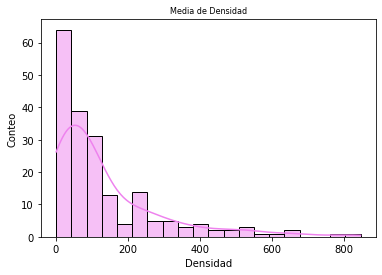

In [15]:
sns.histplot(x = "density",
             data = df_numericas, 
             color = "violet", 
             kde = True, 
             bins = 20 );

# usando 'plt.xlabel()' cambiamos el nombre del eje x
plt.xlabel("Densidad")
# usando el método 'plt.ylabel()' cambiamos el nombre del eje y
plt.ylabel("Conteo");
plt.title("Media de Densidad", fontsize = 8);

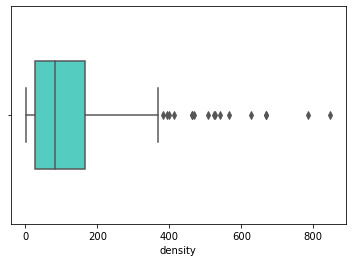

In [16]:
sns.boxplot(x= "density",
            data = df_numericas,
            width=0.5,
            color="turquoise");